In [1]:
import tensorflow as tf
from deeponet import DeepONet
from utils import *
import matplotlib.pyplot as plt

In [2]:
model = DeepONet(
    n_branch = 64 * 64, 
    n_trunk = 2, 
    width = 20, 
    depth = 2, 
    output_dim = 64 * 64,
    activation = "relu"
)

In [21]:
dataloader = DarcyDatasetLoader("DarcyDataset")
dataset = dataloader.get_dataset()

a, u = next(iter(dataset))

print(a.shape)

4096
(10, 64, 64)


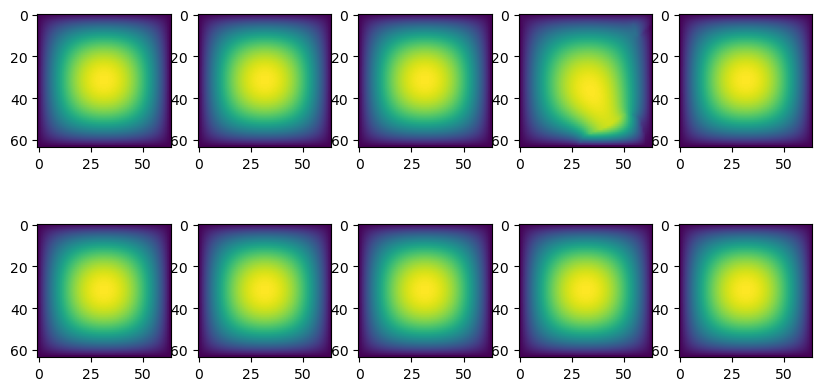

In [28]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
for i, (ai, ui) in enumerate(zip(a, u)):
    axs[i].imshow(ui.numpy().reshape(64, 64))

In [ ]:
coords = tf.meshgrid(tf.linspace(0.0, 1.0, 64), tf.linspace(0.0, 1.0, 64))
coords = tf.stack(coords, axis=-1)
coords = tf.reshape(coords, (-1, 2))

In [ ]:
model.compile(optimizer = "adam", loss = "mse")

In [ ]:
# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

# Training loop
epochs = 20
batch_size = 32

# Prepare the dataset
train_dataset = data_train.batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (a_batch, u_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass
            predictions = model(tf.squeeze(a_batch), coords)
            loss = loss_fn(u_batch, predictions)
        
        # Backward pass and optimization
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        if step % 10 == 0:
            print(f"Step {step}, Loss: {loss.numpy()}", end="\r")

NameError: name 'data_train' is not defined

In [ ]:
coords_test = tf.meshgrid(tf.linspace(0.0, 1.0, 64), tf.linspace(0.0, 1.0, 64))
coords_test = tf.stack(coords_test, axis=-1)
coords_test = tf.reshape(coords_test, (-1, 2))

In [ ]:
def downsample_test(a, u, target_size = (64, 64)):
    a, u = tf.image.resize(tf.expand_dims(a, -1), target_size, antialias=True), u
    a, u = tf.reshape(a, (1, -1)), u
    return a, u

In [ ]:
data_test = data_test.map(downsample_test)

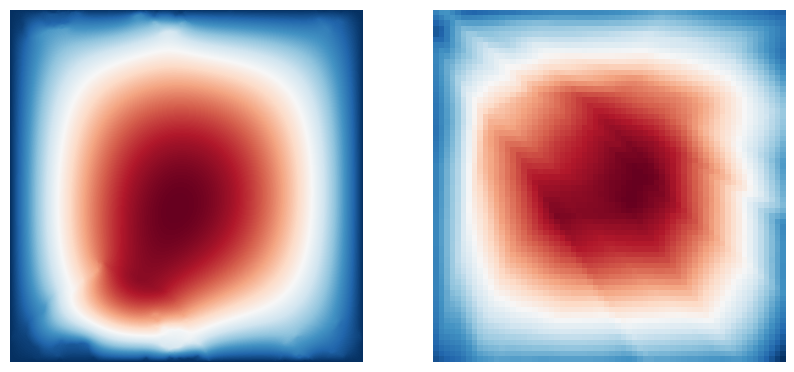

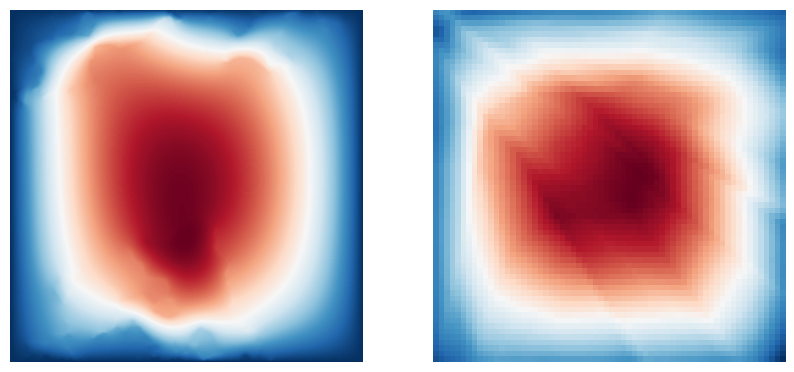

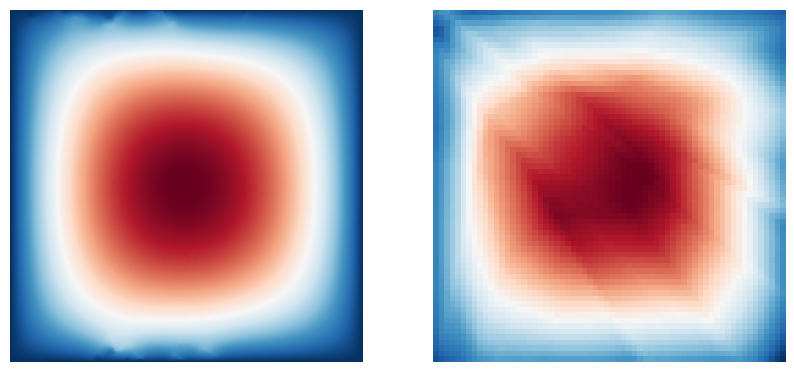

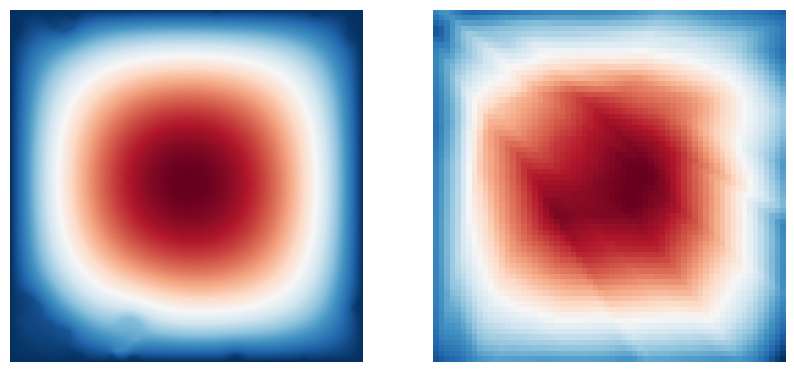

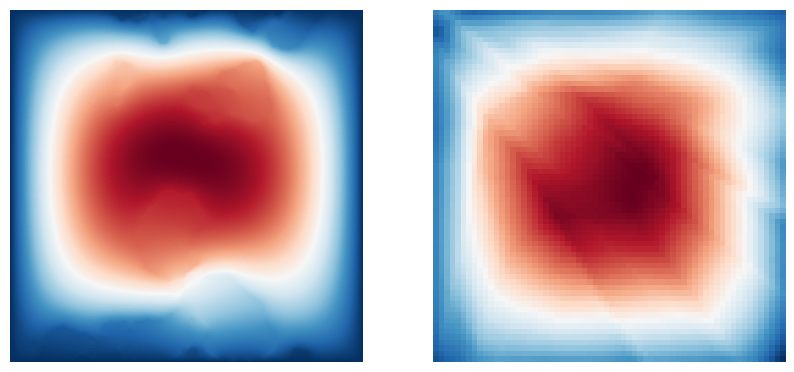

In [ ]:
import matplotlib.pyplot as plt

for a, u in data_test.take(5):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    u_pred = model(a, coords_test)
    u_pred = tf.reshape(u_pred, (64, 64))
    ax[0].imshow(u, cmap = "RdBu_r")
    ax[0].set_axis_off()
    ax[1].imshow(u_pred, cmap = "RdBu_r")
    ax[1].set_axis_off()
    plt.show()